In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Statistical Tests
import scipy.stats as stats

# Visualizing
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from sklearn.model_selection import learning_curve

pd.options.display.float_format = '{:20,.2f}'.format

import wrangle as w 

In [2]:
df = w.get_data()

In [3]:
df = pd.read_csv("zillow.csv")

In [4]:
df = w.clean_df(df)    

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45850 entries, 0 to 52318
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   bathroomcnt                   45850 non-null  float64
 1   bedroomcnt                    45850 non-null  float64
 2   calculatedbathnbr             45817 non-null  float64
 3   calculatedfinishedsquarefeet  45846 non-null  float64
 4   finishedsquarefeet12          45740 non-null  float64
 5   fips                          45850 non-null  object 
 6   fullbathcnt                   45817 non-null  float64
 7   latitude                      45850 non-null  float64
 8   longitude                     45850 non-null  float64
 9   lotsizesquarefeet             45550 non-null  float64
 10  propertycountylandusecode     45850 non-null  object 
 11  propertyzoningdesc            29052 non-null  object 
 12  rawcensustractandblock        45850 non-null  float64
 13  r

# Prepare

In [7]:
train, validate, test = w.split_data(df)

In [8]:
train.head()

,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,latitude,longitude,lotsizesquarefeet,...,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate,heating,property_type,fips_Orange,fips_Ventura
26362,3.00,5.00,3.00,"3,624.00","3,624.00",Ventura,3.00,"34,224,965.00","-119,215,192.00","9,546.00",...,"2,016.00","405,000.00","9,686.34","61,110,029,011,016.00",-0.02,2017-05-24,NaN,Single Family Residential,0,1
30611,2.00,3.00,2.00,"1,611.00","1,611.00",LA,2.00,"33,967,770.00","-118,396,819.00","6,954.00",...,"2,016.00","716,589.00","10,894.99","60,372,770,005,009.00",-0.03,2017-06-12,Central,Single Family Residential,0,0
51922,3.00,5.00,3.00,"3,312.00","3,312.00",LA,3.00,"34,649,556.00","-118,204,442.00","7,698.00",...,"2,016.00","141,000.00","5,448.80","60,379,011,021,010.00",-0.01,2017-09-15,Central,Single Family Residential,0,0
40979,2.00,4.00,2.00,"1,170.00","1,170.00",Orange,2.00,"33,765,397.00","-117,950,998.00","7,200.00",...,"2,016.00","431,172.00","5,982.94","60,590,889,021,009.00",-0.04,2017-07-26,Forced air,Single Family Residential,1,0
17942,3.00,3.00,3.00,"2,201.00","2,201.00",LA,3.00,"33,988,013.00","-117,984,744.00","9,968.00",...,"2,016.00","518,000.00","8,575.79","60,374,085,033,010.00",-0.03,2017-04-17,Central,Single Family Residential,0,0


# Explore

In [9]:
col_cat = [] #this is for my categorical varibles
col_num = [] #this is for my numeric varibles

for col in train.columns[:-3]:
    print(col)
    if train[col].dtype == 'O':
        col_cat.append(col)
    else:
        if len(train[col].unique()) < 4: #making anything with less than 4 unique values a catergorical value
            col_cat.append(col)
        else:
            col_num.append(col)

bathroomcnt
bedroomcnt
calculatedbathnbr
calculatedfinishedsquarefeet
finishedsquarefeet12
fips
fullbathcnt
latitude
longitude
lotsizesquarefeet
propertycountylandusecode
propertyzoningdesc
rawcensustractandblock
regionidcity
regionidcounty
regionidzip
roomcnt
unitcnt
yearbuilt
structuretaxvaluedollarcnt
taxvaluedollarcnt
assessmentyear
landtaxvaluedollarcnt
taxamount
censustractandblock
logerror
transactiondate
heating


In [10]:
# def uni_cat_stats(train):
#     col_cat = [] #this is for my categorical varibles
#     col_num = [] #this is for my numeric varibles

#     for col in train.columns[:-3]:
#         print(col)
#         if train[col].dtype == 'O':
#             col_cat.append(col)
#         else:
#             if len(train[col].unique()) < 4: #making anything with less than 4 unique values a catergorical value
#                 col_cat.append(col)
#             else:
#                 col_num.append(col)
                
#             for col in col_cat:
#                 print(col.upper())
#                 train[col].value_counts().plot.bar()
#                 plt.show()
#                 print()
                
# def uni_num_stats(train):
#     col_cat = [] #this is for my categorical varibles
#     col_num = [] #this is for my numeric varibles

#     for col in train.columns[:-3]:
#         print(col)
#         if train[col].dtype == 'O':
#             col_cat.append(col)
#         else:
#             if len(train[col].unique()) < 4: #making anything with less than 4 unique values a catergorical value
#                 col_cat.append(col)
#             else:
#                 col_num.append(col)
                
#             for col in col_num:
# #                 print(col.upper())
#                  print(train[col].hist())
#                  plt.show()
                

In [11]:
# uni_num_stats(train)

In [12]:
train.columns

Index(['bathroomcnt', 'bedroomcnt', 'calculatedbathnbr',
       'calculatedfinishedsquarefeet', 'finishedsquarefeet12', 'fips',
       'fullbathcnt', 'latitude', 'longitude', 'lotsizesquarefeet',
       'propertycountylandusecode', 'propertyzoningdesc',
       'rawcensustractandblock', 'regionidcity', 'regionidcounty',
       'regionidzip', 'roomcnt', 'unitcnt', 'yearbuilt',
       'structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 'assessmentyear',
       'landtaxvaluedollarcnt', 'taxamount', 'censustractandblock', 'logerror',
       'transactiondate', 'heating', 'property_type', 'fips_Orange',
       'fips_Ventura'],
      dtype='object')

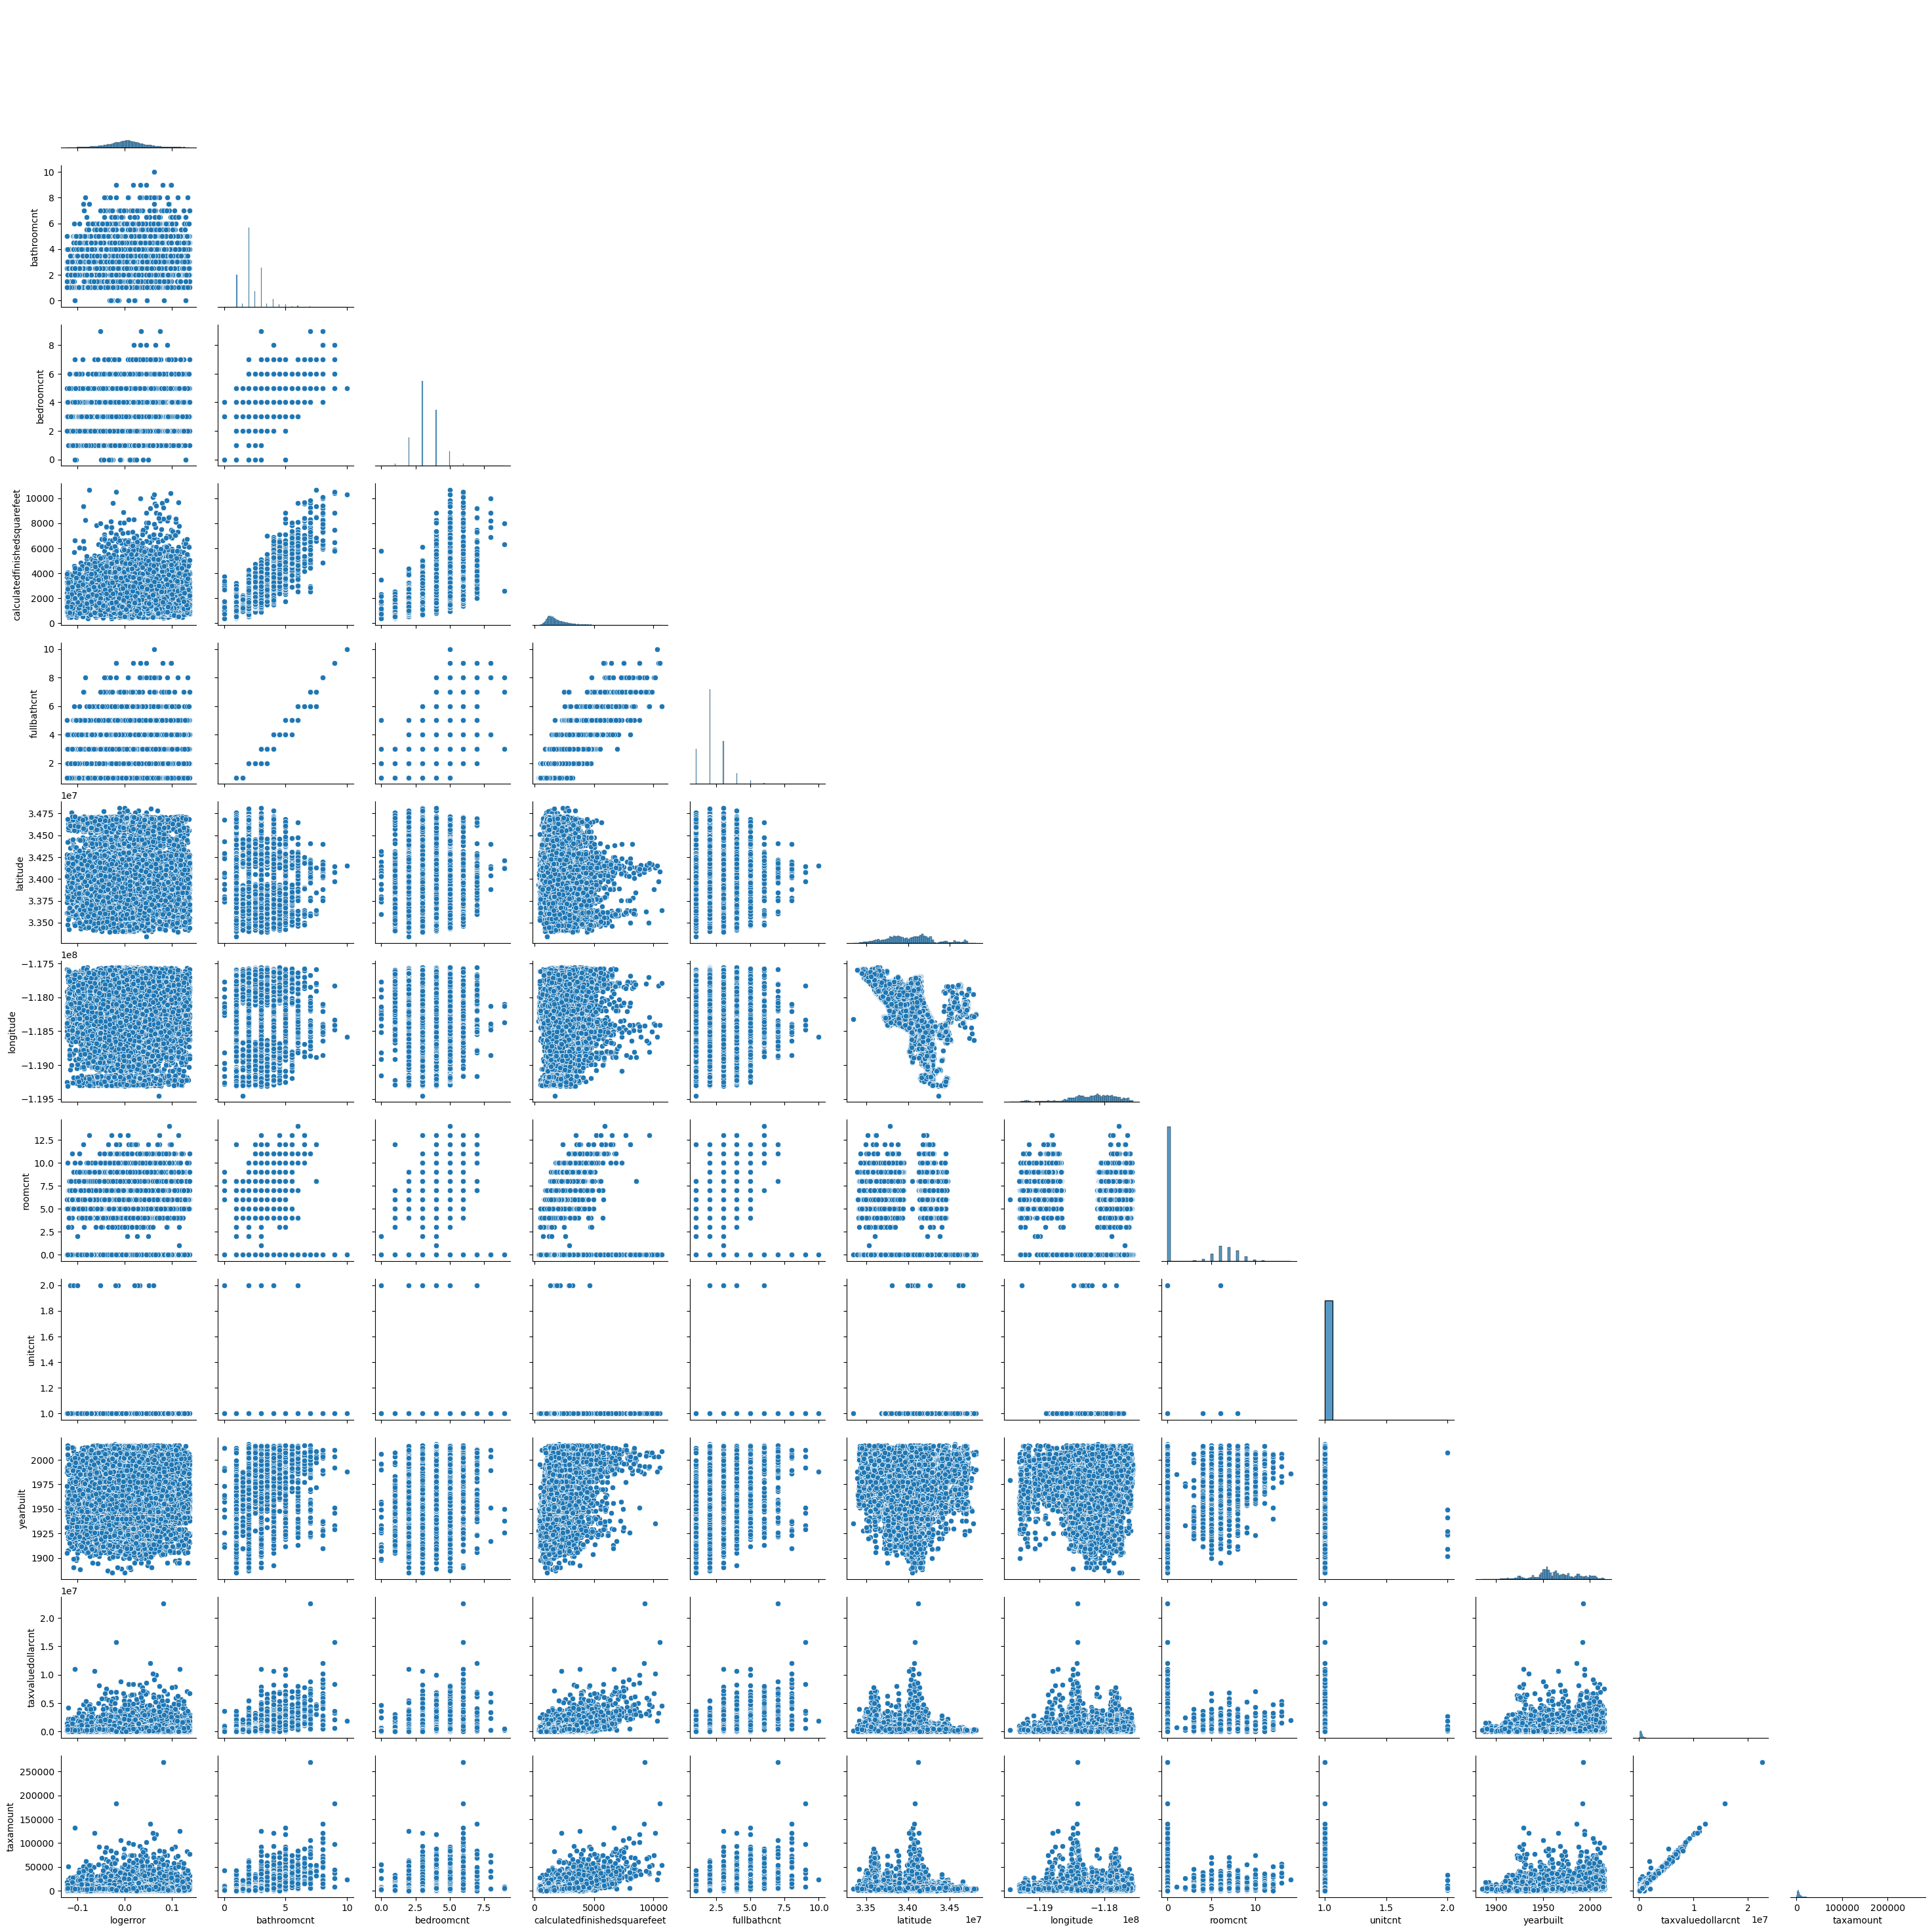

In [19]:
#only looking at my unprocessed data only
sns.pairplot(
            train[['logerror','bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'fullbathcnt',
       'latitude', 'longitude', 'roomcnt', 'unitcnt', 'yearbuilt', 'taxvaluedollarcnt', 
    'taxamount', 'transactiondate', 'heating', 'property_type']], 
  
             corner=True
            )
plt.show()